<a href="https://colab.research.google.com/github/silviacfreitas/PressaoEstetica/blob/main/PressaoEstetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A pressão estética sobre o corpo nas mulheres



### Introdução

Nessa análise, iremos trabalhar com uma amostra dos dados da pesquisa do IBGE PENSE 2015 (Pesquisa Nacional de Saúde Escolar) para entender como jovens mulheres sofrem uma pressão da sociedade para manter um corpo dentro dos padrões que foram estabelecidos. <br>

A pesquisa fornece informações sobre as características básicas da população de estudo, incluindo aspectos socioeconômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; contextos social e familiar; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental; e percepção da imagem corporal, entre outros tópicos. Características do ambiente escolar e do entorno são também contempladas, incluindo informações relacionadas à infraestrutura disponível para alimentação e atividade física; acessibilidade; saneamento básico; existência de regras e normas de conduta adotadas pelas escolas; políticas de assistência à saúde; e nível de segurança do entorno, entre outros aspectos.<br>
O dicionário da pesquisa pode ser encontrado no [link](https://https://docs.google.com/spreadsheets/d/1-WYCrWjK4Rn6kSU94l0mNINq7YUvzg4X/edit#gid=356434438).

In [24]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums


In [25]:
url = "/content/drive/MyDrive/BootcampDSModulo03/PeNSE_2015_AMOSTRA2.zip"


In [26]:
zip = ZipFile(url)

In [27]:
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [28]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [29]:
caminho_pasta_zipada = zip.namelist()[1]
caminho_pasta_zipada

'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

In [30]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep=";", thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


### Motivos de intimidação ou humilhação

Na questão VB07008, os alunos são questionados: "NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?".

In [31]:
respostas_intimidacao = {
    -1: 'Sem resposta',
    1: 'Cor ou raça',
    2: 'Religião',
    3: 'Aparência do rosto',
    4: 'Aparência do corpo',
    5: 'Orientação sexual',
    6: 'Região de origem',
    7: 'Outros motivos',
    99: 'Não informado'
}
frequencia_cruzada = pd.crosstab(dados['VB07008'], dados['VB01001'], normalize='index')*100
frequencia_cruzada.rename(index=respostas_intimidacao, inplace=True)
frequencia_cruzada.rename_axis('Motivo de intimidação/ humilhação', inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
Motivo de intimidação/ humilhação,,
Sem resposta,49.113514,50.886486
Cor ou raça,65.508685,34.491315
Religião,56.846473,43.153527
Aparência do rosto,55.177305,44.822695
Aparência do corpo,44.414414,55.585586
Orientação sexual,71.875000,28.125000
Região de origem,57.142857,42.857143
Outros motivos,49.766095,50.233905
Não informado,55.696203,44.303797


In [32]:
dados_intimidacao = dados.query('VB07008 == 1 | VB07008 == 2 | VB07008 == 3 | VB07008 == 4 | VB07008 == 5 | VB07008 == 6')

In [33]:
intimidacao_ordenado = dados_intimidacao['VB07008'].value_counts()
intimidacao_ordenado.index

Int64Index([4, 3, 1, 2, 5, 6], dtype='int64')

In [34]:
labels = [respostas_intimidacao[x] for x in intimidacao_ordenado.index]

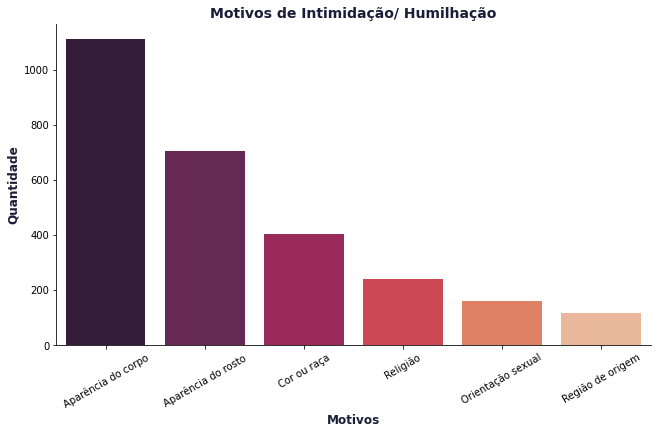

In [35]:
font = {'color':  '#1a1e38',
        'weight': 'bold',
        'size': 14,
        }
colors =  sns.color_palette('rocket', 6)
ax = sns.catplot(data=dados_intimidacao, x='VB07008', 
                 kind='count', palette=colors, height=5,
                 aspect=1.8, order=intimidacao_ordenado.index)
ax.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.title('Motivos de Intimidação/ Humilhação', fontdict=font)
plt.xlabel("Motivos", fontdict={"color": "#1a1e38", "weight": "bold", "size": 12})
plt.ylabel("Quantidade", fontdict={"color": "#1a1e38", "weight": "bold", "size": 12})
plt.show()

No gráfico acima, podemos notar que a aparência do corpo é o fator que mais aparece com causa de constrangimento, intimidação e humilhação.

Comparando agora a incidência de cada motivo alunos do sexo masculino e feminino, notamos que há uma diferença significativa entre os sexos em cada motivo.

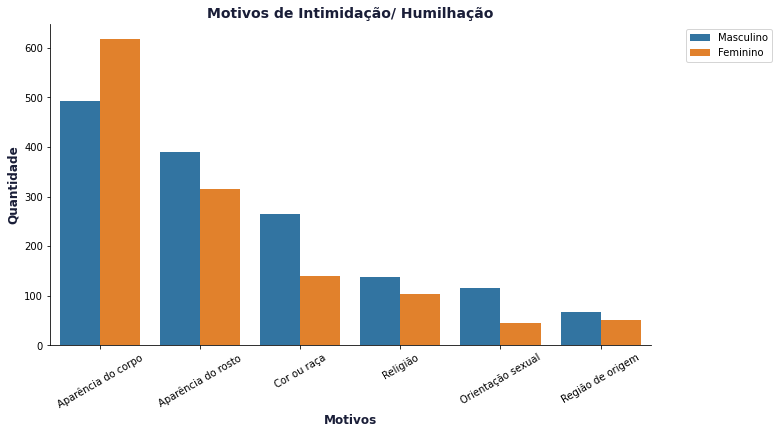

In [36]:
sexo = ['Masculino', 'Feminino']
ax = sns.catplot(data=dados_intimidacao, x='VB07008', kind='count', hue='VB01001',
                 height=5, aspect=1.8, order=intimidacao_ordenado.index, legend=False)
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', labels=sexo)
plt.xticks(rotation=30)
plt.title('Motivos de Intimidação/ Humilhação', fontdict=font)
plt.xlabel('Motivos', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
plt.ylabel('Quantidade', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
ax;

Fica evidente que os alunos do sexo masculino sofrem mais que os do sexo feminino quando se trata de etnia e orientação sexual. Já quando falamos em aparência do corpo, o percentual de mulheres que é atiginda por intimidação ou humilhação é consideravelmente maior. <br><br>



### Índice de Massa Corporal

A seguir, vamos calcular o Ìndice de Massa Corporal (IMC) para verificar se há entre as alunas uma taixa maior de sobrepeso e obesidade do que nos alunos.<br>
Pela definição da Organização Mundial da Saúde, obesidade é o excesso de gordura corporal, em quantidade que determine prejuízos à saúde. Uma pessoa é considerada obesa quando seu IMC é maior ou igual a 30 kg/m2 e a faixa de peso normal varia entre 18,5 e 24,9 kg/m2. Os indivíduos que possuem IMC entre 25 e 29,9 kg/m2 são diagnosticados com sobrepeso e já podem ter alguns prejuízos com o excesso de gordura.

In [37]:
dados_intimidacao['IMC'] = dados_intimidacao['VB17003']/(dados_intimidacao['VB17004']/100)**2
dados_intimidacao.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296,28.122076
5,2015,76,1,1,2,4,14,12,6,1,1,7,3,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,7,8,3,8,1,5,6,1,4,1,...,2,4,2,2,4,1,2,2,1,1,1,1,2,1,2,2,2,1,2,2,2,1,2,729.0,1605.0,72.9,160.5,2,4,1223,1,355.170081,1,2,4,1,6,1,296,28.299415
9,2015,76,1,1,2,1,14,7,6,1,2,7,2,2,-1,1,1,1,1,1,1,3,2,4,1,2,2,5,2,2,2,1,7,3,3,1,1,1,-1,2,...,1,2,2,3,4,1,2,1,2,2,13,1,1,2,2,2,2,2,2,2,2,1,2,479.0,1562.0,47.9,156.2,2,2,1223,1,355.170081,1,2,4,1,10,1,296,19.632403
10,2015,76,1,1,2,4,13,12,7,1,1,7,4,2,-1,1,1,2,1,1,2,3,1,4,1,2,2,5,3,2,1,8,3,4,2,6,6,4,-1,2,...,4,5,2,2,4,1,2,1,3,2,5,1,1,2,2,1,2,2,2,2,2,2,2,489.0,1460.0,48.9,146.0,2,3,1223,1,299.735235,1,2,4,1,11,1,296,22.940514
12,2015,76,1,1,2,4,14,5,7,2,1,5,4,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,6,3,6,2,5,7,2,3,3,3,3,-1,2,...,1,4,3,4,4,1,2,2,2,2,99,2,2,2,2,2,2,2,2,1,2,2,2,581.0,1628.0,58.1,162.8,2,2,1223,1,355.170081,1,2,4,1,13,1,296,21.921352


In [38]:
classes = [0, 18.5, 25, 30, 60]
labels_imc = ['Abaixo', 'Ideal', 'Sobrepeso', 'Obesidade']

In [39]:
dados_intimidacao['CLASSIFICACAO_IMC'] = pd.cut(x = dados_intimidacao['IMC'],
       bins = classes,
       labels = labels_imc,
       include_lowest = True)
dados_intimidacao[['IMC','CLASSIFICACAO_IMC']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,IMC,CLASSIFICACAO_IMC
4,28.122076,Sobrepeso
5,28.299415,Sobrepeso
9,19.632403,Ideal
10,22.940514,Ideal
12,21.921352,Ideal


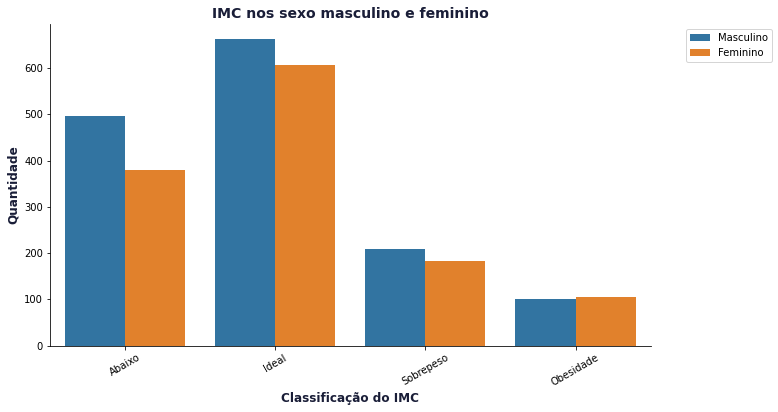

In [40]:
sexo = ['Masculino', 'Feminino']
ax = sns.catplot(data=dados_intimidacao, x='CLASSIFICACAO_IMC', kind='count', hue='VB01001',
                 height=5, aspect=1.8, legend=False)
ax.set_xticklabels(labels_imc)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', labels=sexo)
plt.xticks(rotation=30)
plt.title('IMC nos sexo masculino e feminino', fontdict=font)
plt.xlabel('Classificação do IMC', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
plt.ylabel('Quantidade', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
ax;

Observamos acima que os índices de obesidade entre homens e mulheres são bem similares, enquanto o índice de sobrepeso é ainda maior entre os homens. <br><br>
Mesmo com menor índice de sobrepeso quando comparado com os alunos do sexo masculino, as mulheres sofrem muito mais pressão, intimidação e humilhação a respeito da aparência dos seus corpos do que os homens.<br><br>


### Sentimento com relação ao próprio corpo
Na questão VB11007 no questionário, temos outro ponto muito importante na pesquisa é questão: "Como você se sente em relação ao seu corpo?". Vamos analisar como homens e mulheres respondem à este questionamento:

In [41]:
respostas_insatisfacao = {
    1: 'Muito Satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4: 'Insatisfeito(a)',
    5: 'Muito insatisfeito(a)',
    99: 'Não informado'
}

In [42]:
frequencia_cruzada = pd.crosstab(dados_intimidacao['VB11007'], dados_intimidacao['VB01001'])
frequencia_cruzada.rename(index=respostas_insatisfacao, inplace=True)
frequencia_cruzada.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito(a),415,253
Satisfeito(a),480,373
Indiferente,217,178
Insatisfeito(a),236,308
Muito insatisfeito(a),108,151
Não informado,10,9


In [43]:
insatisfacao_ordenado = dados_intimidacao['VB11007'].value_counts()
insatisfacao_ordenado.index

Int64Index([2, 1, 4, 3, 5, 99], dtype='int64')

In [44]:
labels_insatisfacao = [respostas_insatisfacao[x] for x in insatisfacao_ordenado.index]

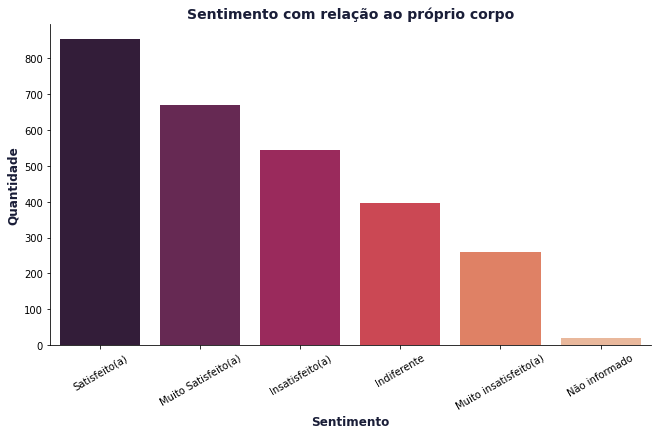

In [45]:
font = {'color':  '#1a1e38',
        'weight': 'bold',
        'size': 14,
        }
colors =  sns.color_palette('rocket', 6)
ax = sns.catplot(data=dados_intimidacao, x='VB11007', 
                 kind='count', palette=colors, height=5,
                 aspect=1.8, order=insatisfacao_ordenado.index)
ax.set_xticklabels(labels_insatisfacao)
plt.xticks(rotation=30)
plt.title('Sentimento com relação ao próprio corpo', fontdict=font)
plt.xlabel('Sentimento', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
plt.ylabel('Quantidade', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
plt.show()

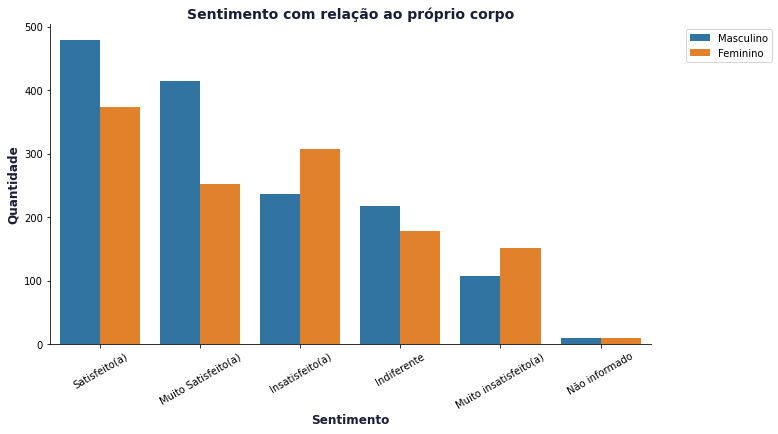

In [46]:
sexo = ['Masculino', 'Feminino']
ax = sns.catplot(data=dados_intimidacao, x='VB11007', kind='count', hue='VB01001',
                 height=5, aspect=1.8, order=insatisfacao_ordenado.index, legend=False)
ax.set_xticklabels(labels_insatisfacao)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', labels=sexo)
plt.xticks(rotation=30)
plt.title('Sentimento com relação ao próprio corpo', fontdict=font)
plt.xlabel('Sentimento', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
plt.ylabel('Quantidade', fontdict={'color': '#1a1e38', 'weight': 'bold', 'size': 12})
ax;

Conforme podemos verificar, quantidade de mulheres instisfeitas e muito insatisfeitas com o próprio corpo é muito maior que a dos homens.<br><br>


### Conculsão

Na sociedade atual, o "corpo perfeito" virou uma busca para a maioria dos indivíduos. As redes sociais, os aplicativos de imagens e filtros estão intensificando a tendência de pressão de perfeição, principalmente nas novas gerações, que já nasceram com issa influência. <br>
Nessa análise, podemos verificar que essa pressão estética é mais intensa nas mulheres. Mesmo com um menor ídice de sobrepeso, as mulheres demostraram estar muito mais instisfeitas com o próprio corpo. Além disso, mas mulheres relatam ter sido a aparência do corpo com pricipal causa de se sentirem zombadas, intimidadas e humilhadas. <br>
As consequências disso podem ser gradíssimas se a sociedade como um todo não começar a tomar medidas para aliviar a busca pela perfeição estética. 